In [1]:
import sys
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
sys.path.append('../')

from data.dataset import FunctionDataset
from model.mlp.mlp import MLP

# 1D dataset

In [11]:
def toy_dataset(x):
    return torch.exp(torch.sin(torch.pi * x[:, 0]) + x[:, 1] ** 2)

train_dataset = FunctionDataset(func=toy_dataset,
                          num_samples=200,
                          range=[(-1, 1), (-1, 1)],
                          noise_std=0.0)

val_dataset = FunctionDataset(func=toy_dataset,
                            num_samples=50,
                            range=[(-1, 1), (-1, 1)],
                            noise_std=0.0)
test_dataset = FunctionDataset(func=toy_dataset,
                            num_samples=50,
                            range=[(-1, 1), (-1, 1)],
                            noise_std=0.0)
train_loader = train_dataset.get_dataloader(batch_size=32, shuffle=False)
val_loader = val_dataset.get_dataloader(batch_size=32, shuffle=False)
test_loader = test_dataset.get_dataloader(batch_size=32, shuffle=False)

In [12]:
model = MLP(width=[2, 128, 128, 1], activation=nn.ReLU(), device='cpu')

In [13]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_func = nn.MSELoss()

train_loss_list, val_loss_list = model.train_model(train_loader, val_loader, optimizer, loss_func, epochs=200)


  0%|          | 0/200 [00:00<?, ?it/s]c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
train_loss: 1.7112122178077698, val_loss: 1.4642592072486877: 100%|██████████| 200/200 [00:05<00:00, 39.44it/s]


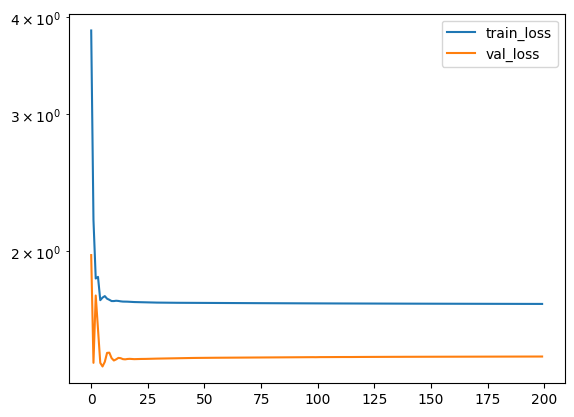

In [15]:
plt.plot([i for i in range(len(train_loss_list))], train_loss_list, label="train_loss")
plt.plot([i for i in range(len(val_loss_list))], val_loss_list, label="val_loss")
plt.yscale('log', base=10)
plt.legend()
plt.show();

In [16]:
model.test_model(test_loader, loss_func)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([18])) that is different to the input size (torch.Size([18, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


1.7523908615112305